###  PCA Crabs Dataset

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/crab.jpg" width="750" align="center">

In [ ]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/crabs.csv

--2023-04-18 17:11:21--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/crabs.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.149.46
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.149.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10189 (10.0K) [text/csv]
Saving to: ‘crabs.csv’

crabs.csv           100%[===================>]   9.95K  --.-KB/s    in 0s      

2023-04-18 17:11:21 (127 MB/s) - ‘crabs.csv’ saved [10189/10189]



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/crabs.csv"

### Initial Study of the Dataset

In [3]:
df = pd.read_csv(path)
df

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale
...,...,...,...,...,...,...,...,...,...
195,Orange,Female,46,21.4,18.0,41.2,46.2,18.7,OrangeFemale
196,Orange,Female,47,21.7,17.1,41.7,47.2,19.6,OrangeFemale
197,Orange,Female,48,21.9,17.2,42.6,47.4,19.5,OrangeFemale
198,Orange,Female,49,22.5,17.2,43.0,48.7,19.8,OrangeFemale


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   species           200 non-null    object 
 1   sex               200 non-null    object 
 2   index             200 non-null    int64  
 3   Frontal Lobe      200 non-null    float64
 4   Rear Width        200 non-null    float64
 5   Carapace Midline  200 non-null    float64
 6   Maximum Width     200 non-null    float64
 7   Body Depth        200 non-null    float64
 8   class             200 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 14.2+ KB


In [5]:
df.describe(include="all")

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
count,200,200,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200
unique,2,2,NaN,NaN,NaN,NaN,NaN,NaN,4
top,Blue,Male,NaN,NaN,NaN,NaN,NaN,NaN,BlueMale
freq,100,100,NaN,NaN,NaN,NaN,NaN,NaN,50
mean,NaN,NaN,25.500000,15.583000,12.73850,32.105500,36.414500,14.030500,NaN
std,NaN,NaN,14.467083,3.495325,2.57334,7.118983,7.871955,3.424772,NaN
min,NaN,NaN,1.000000,7.200000,6.50000,14.700000,17.100000,6.100000,NaN
25%,NaN,NaN,13.000000,12.900000,11.00000,27.275000,31.500000,11.400000,NaN
50%,NaN,NaN,25.500000,15.550000,12.80000,32.100000,36.800000,13.900000,NaN
75%,NaN,NaN,38.000000,18.050000,14.30000,37.225000,42.000000,16.600000,NaN


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,200.0,25.5000,14.467083,1.0,13.000,25.50,38.000,50.0
Frontal Lobe,200.0,15.5830,3.495325,7.2,12.900,15.55,18.050,23.1
Rear Width,200.0,12.7385,2.573340,6.5,11.000,12.80,14.300,20.2
Carapace Midline,200.0,32.1055,7.118983,14.7,27.275,32.10,37.225,47.6
Maximum Width,200.0,36.4145,7.871955,17.1,31.500,36.80,42.000,54.6
Body Depth,200.0,14.0305,3.424772,6.1,11.400,13.90,16.600,21.6


In [7]:
df.shape

(200, 9)

In [8]:
df['class'].value_counts()

,count
class,
BlueMale,50
BlueFemale,50
OrangeMale,50
OrangeFemale,50


In [9]:
df.corr(numeric_only=True)

,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
index,1.000000,0.862876,0.840040,0.911436,0.928248,0.864459
Frontal Lobe,0.862876,1.000000,0.906988,0.978842,0.964956,0.987627
Rear Width,0.840040,0.906988,1.000000,0.892743,0.900402,0.889205
Carapace Midline,0.911436,0.978842,0.892743,1.000000,0.995023,0.983204
Maximum Width,0.928248,0.964956,0.900402,0.995023,1.000000,0.967812
Body Depth,0.864459,0.987627,0.889205,0.983204,0.967812,1.000000


In [10]:
## Selection only numerical features

data_columns = ['Frontal Lobe','Rear Width','Carapace Midline','Maximum Width','Body Depth']
df[data_columns].describe()

,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
count,200.000000,200.00000,200.000000,200.000000,200.000000
mean,15.583000,12.73850,32.105500,36.414500,14.030500
std,3.495325,2.57334,7.118983,7.871955,3.424772
min,7.200000,6.50000,14.700000,17.100000,6.100000
25%,12.900000,11.00000,27.275000,31.500000,11.400000
50%,15.550000,12.80000,32.100000,36.800000,13.900000
75%,18.050000,14.30000,37.225000,42.000000,16.600000
max,23.100000,20.20000,47.600000,54.600000,21.600000


<Axes: >

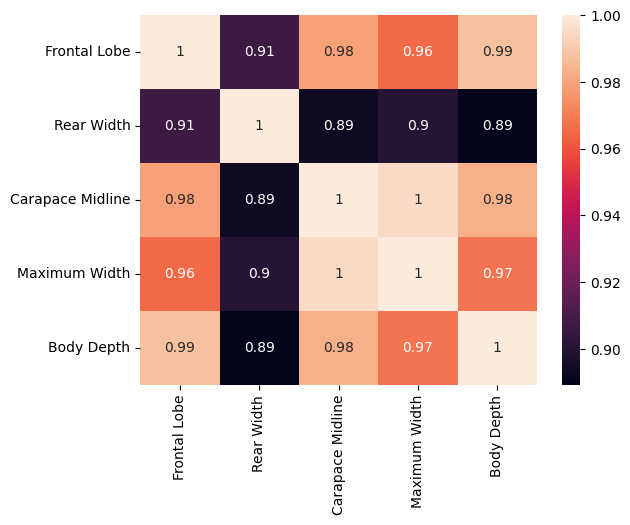

In [11]:
import seaborn as sns

sns.heatmap(df[data_columns].corr(),annot=True)

Boxplot of the relevant features.


<Axes: >

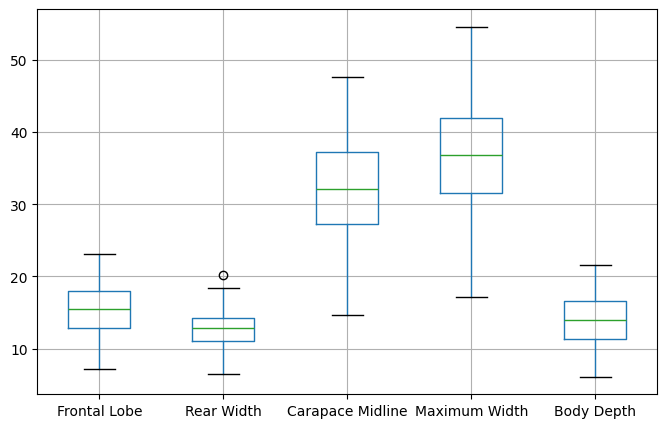

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
df[data_columns].boxplot()


### Initial Visualization of the Classes

<Axes: title={'center': 'Frontal Lobe'}, xlabel='class'>

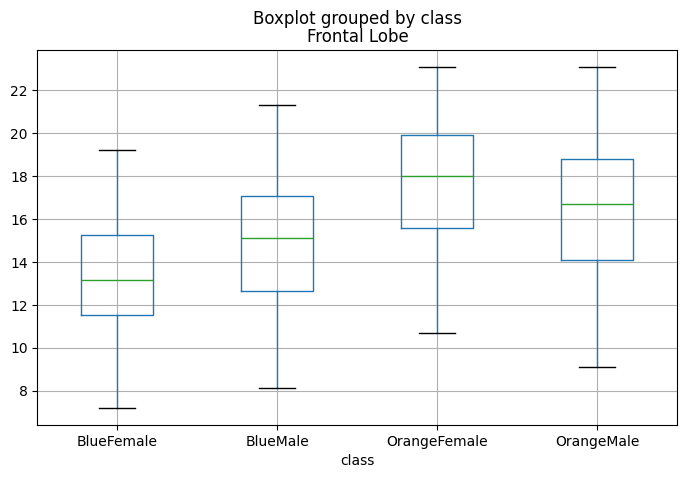

In [13]:
df.boxplot(column='Frontal Lobe', by = 'class', figsize=(8,5))

<Axes: title={'center': 'Rear Width'}, xlabel='class'>

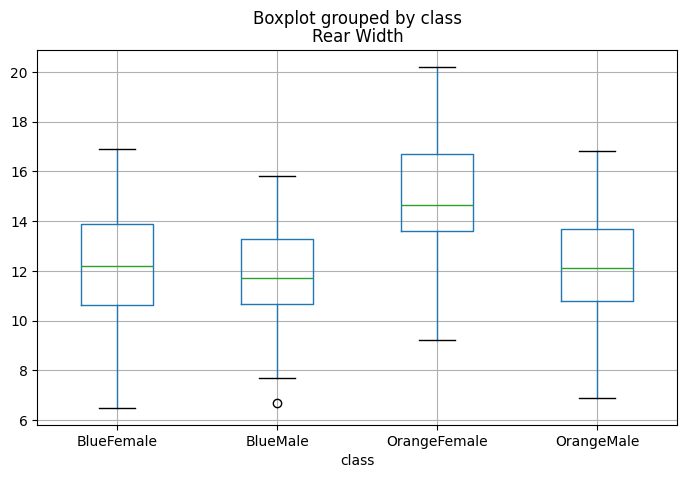

In [14]:
df.boxplot(column='Rear Width', by = 'class', figsize=(8,5))

<Axes: title={'center': 'Carapace Midline'}, xlabel='class'>

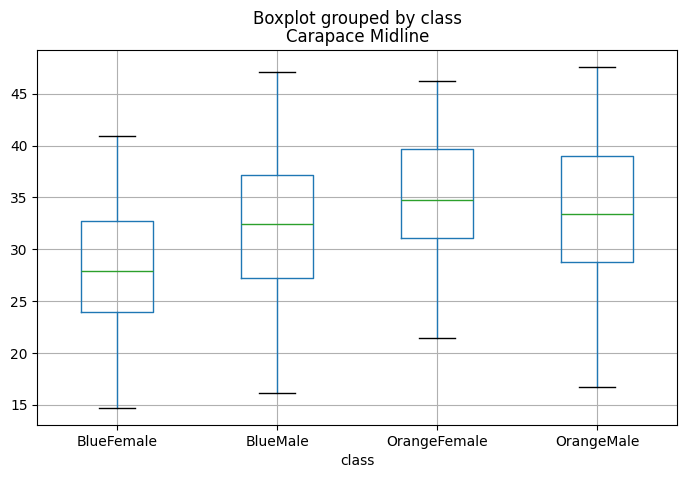

In [15]:
df.boxplot(column='Carapace Midline', by = 'class', figsize=(8,5))

<Axes: title={'center': 'Body Depth'}, xlabel='class'>

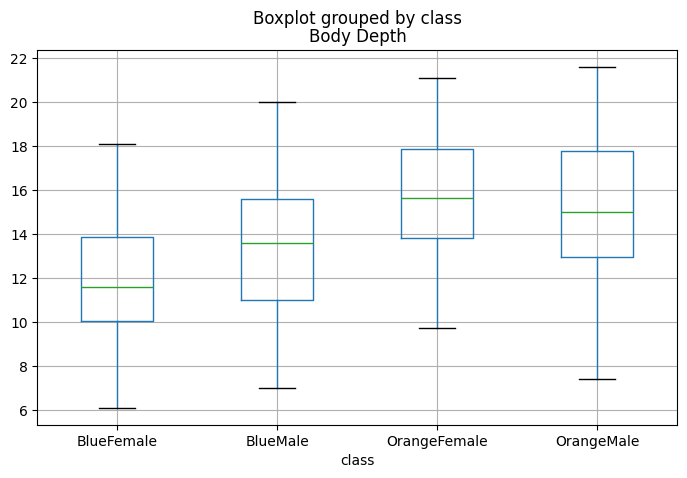

In [16]:
df.boxplot(column='Body Depth', by = 'class', figsize=(8,5))

<Axes: title={'center': 'Body Depth'}, xlabel='class'>

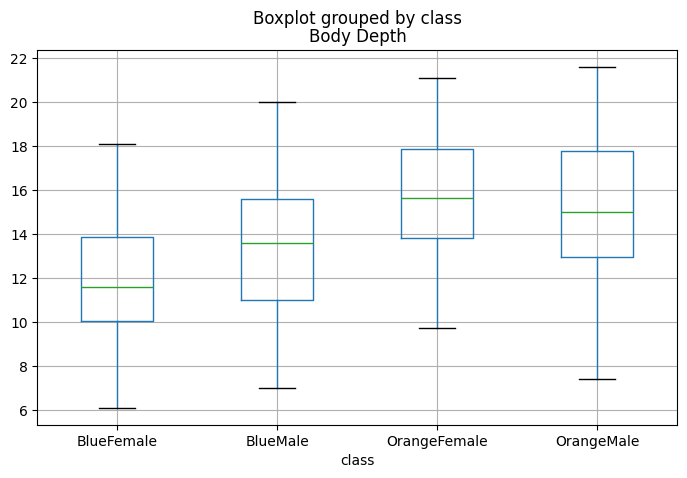

In [17]:
df.boxplot(column='Body Depth', by = 'class', figsize=(8,5))

Histograms Study.

array([[<Axes: title={'center': 'Frontal Lobe'}>,
        <Axes: title={'center': 'Rear Width'}>,
        <Axes: title={'center': 'Carapace Midline'}>,
        <Axes: title={'center': 'Maximum Width'}>,
        <Axes: title={'center': 'Body Depth'}>, <Axes: >]], dtype=object)

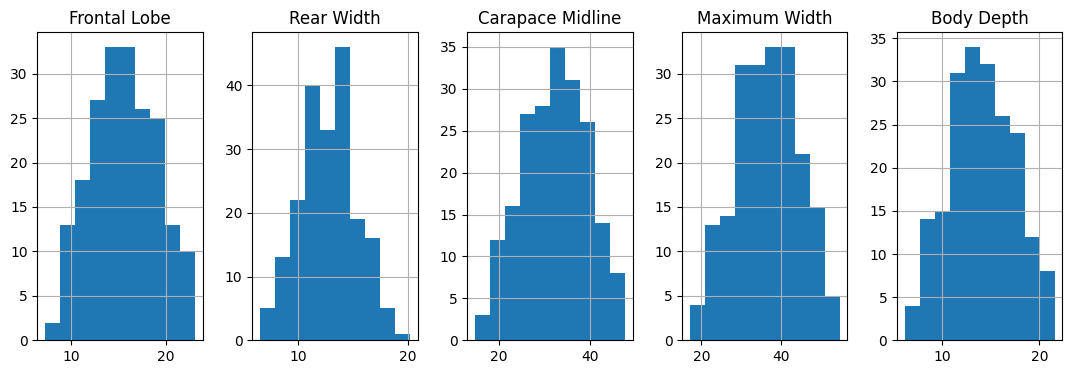

In [18]:
df[data_columns].hist(figsize=(16,4),layout=(1,6)) # layout = Tuple of (rows, columns) the histograms

<Axes: xlabel='Frontal Lobe', ylabel='Count'>

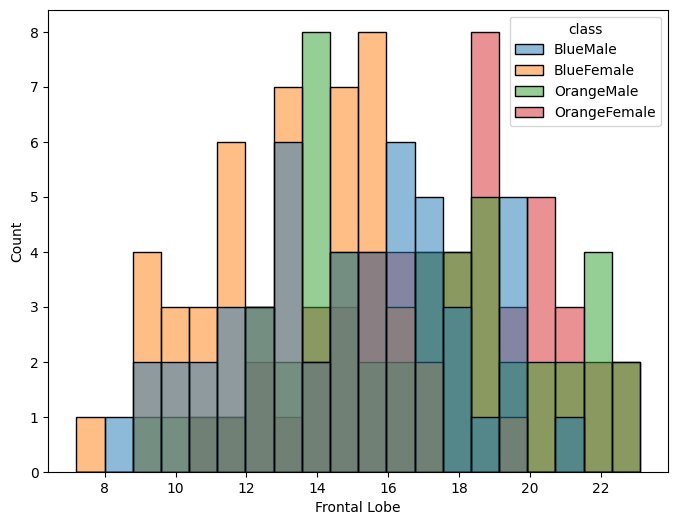

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(df,x='Frontal Lobe',hue='class',bins=20)


<Axes: xlabel='Rear Width', ylabel='Count'>

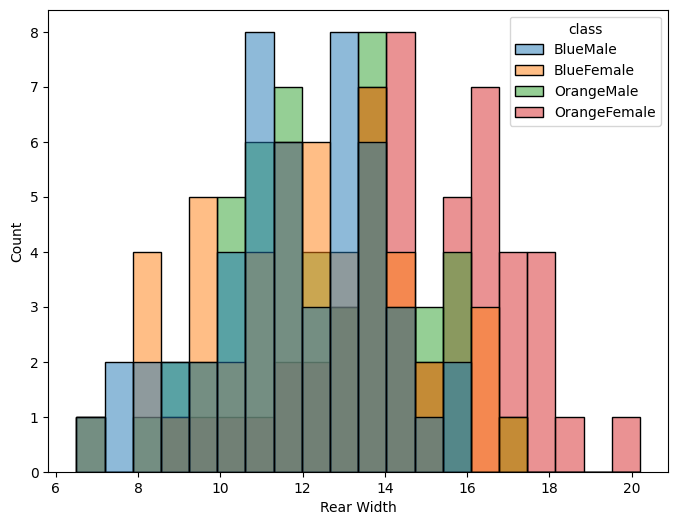

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(df,x='Rear Width',hue='class',bins=20)

<Axes: xlabel='Carapace Midline', ylabel='Count'>

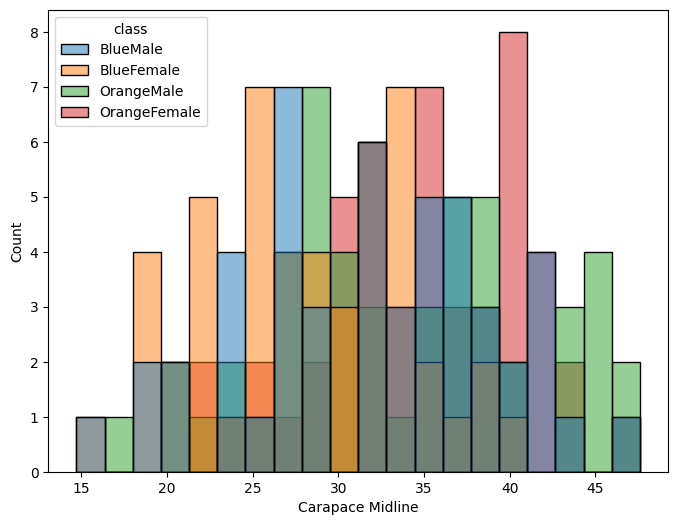

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(df,x='Carapace Midline',hue='class',bins=20)

<Axes: xlabel='Maximum Width', ylabel='Count'>

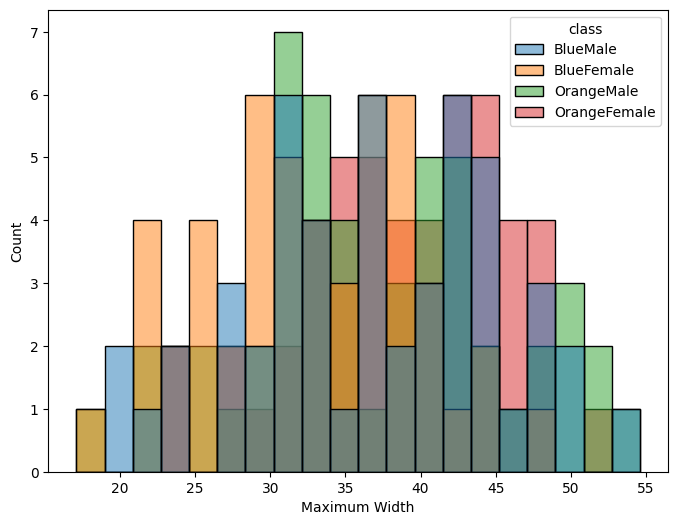

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(df,x='Maximum Width',hue='class',bins=20)

<Axes: xlabel='Body Depth', ylabel='Count'>

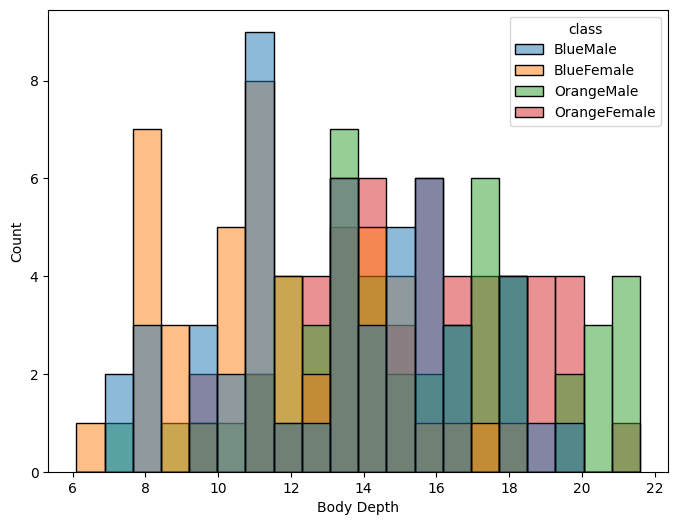

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(df,x='Body Depth',hue='class',bins=20)

Pairplot: allows us to plot pairwise relationships between variables within a dataset

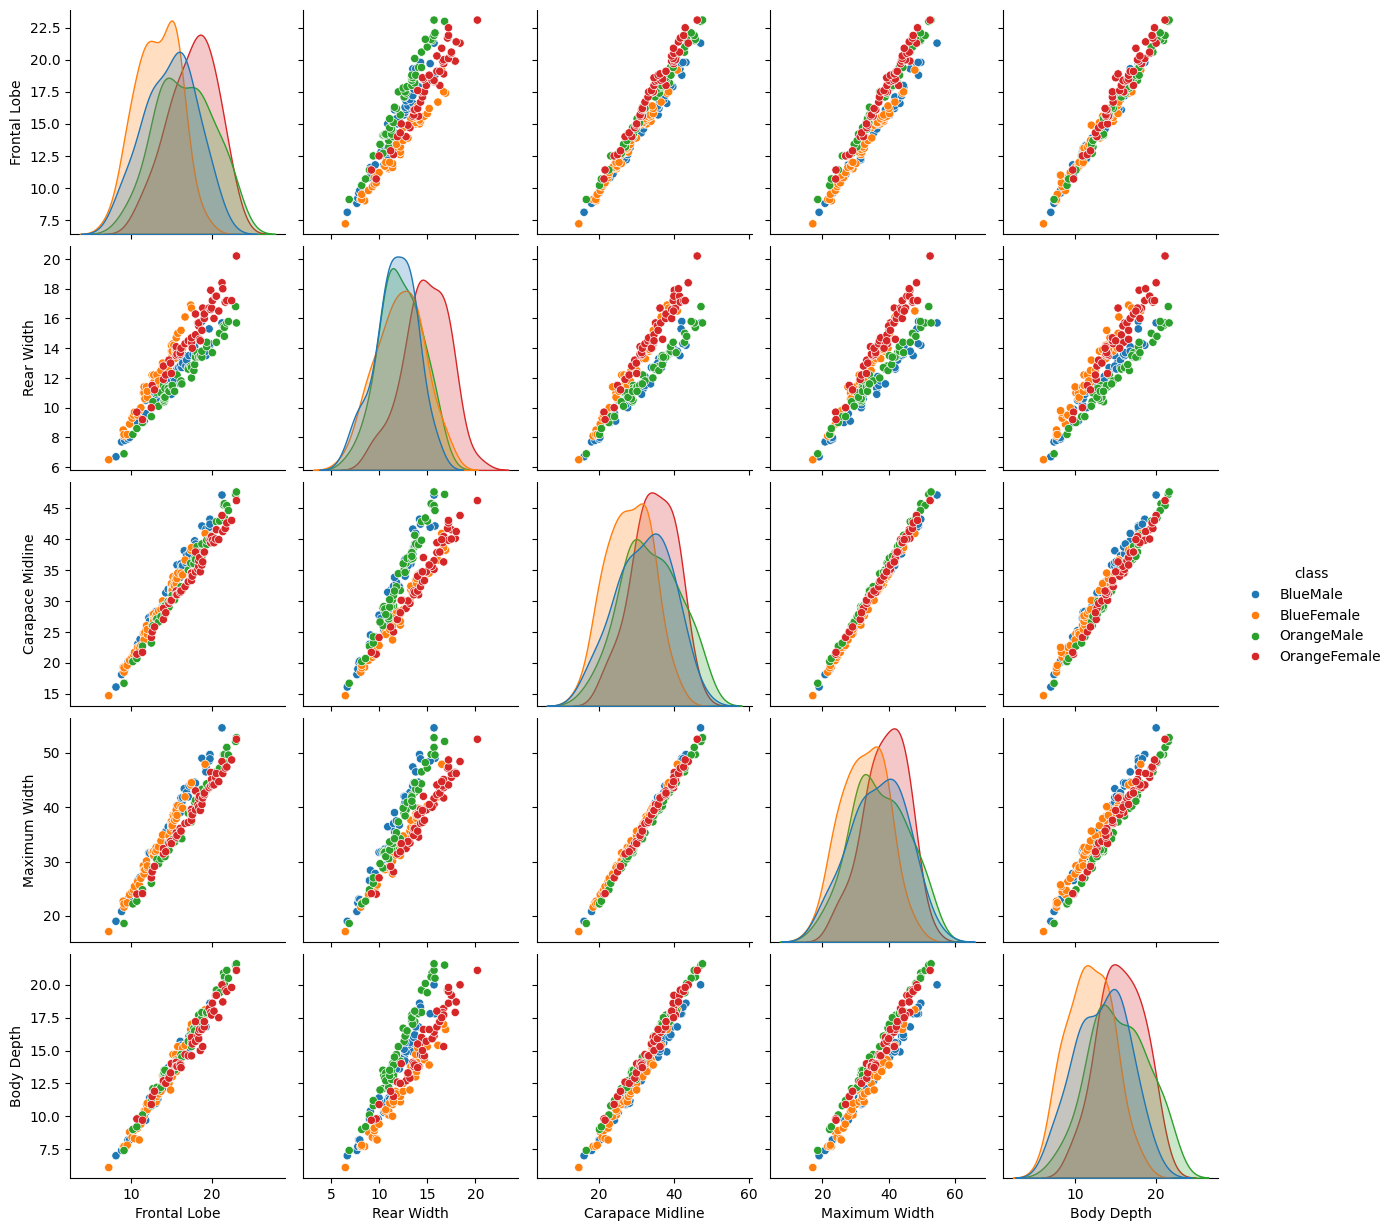

In [24]:
sns.pairplot(df.iloc[:,3:],hue='class')

### Discussion for using PCA
The high dimensionality of the data makes it difficult to manage and understand it.

Dimensionality reduction methods allow


*   Reduce unnecessary dimensions/noise
*   Reduce the computational cost of learning
*   Visualize data in 2D/3D

## PCA
Now we are going to use PCA to make a better visualization of our data.

Data must be standardized in order to apply PCA.
We will standardize it. This will change the data so that all variables have mean 0 and standard deviation 1.




<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/pca.jpg" width="750" align="center">

In [25]:
df_standardized = df.copy()
df_standardized[data_columns] = StandardScaler().fit_transform(df[data_columns])

In [26]:
df_standardized[data_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Frontal Lobe,200.0,-7.105427e-17,1.002509,-2.404365,-0.769523,-0.009465,0.707571,2.155984
Rear Width,200.0,6.039613e-16,1.002509,-2.430365,-0.677276,0.023959,0.608322,2.906815
Carapace Midline,200.0,1.065814e-16,1.002509,-2.451077,-0.680241,-0.000775,0.720938,2.181966
Maximum Width,200.0,-4.973799e-16,1.002509,-2.459741,-0.625872,0.049094,0.711325,2.315960
Body Depth,200.0,0.000000e+00,1.002509,-2.321439,-0.770008,-0.038200,0.752152,2.215766


Let's proceed to use PCA.

The scikit-learn PCA method will return the explained variance ratio and all relevant PCA-related parameters.

You can use the explained variance ratio and the singular values to decide how many components to keep.

In [27]:
df_standardized[data_columns].shape

(200, 5)

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

myPCA = PCA().fit(df_standardized[data_columns])

print(myPCA.explained_variance_ratio_) # returns a vector of the variance explained by each dimension.

print(myPCA.explained_variance_ratio_.cumsum()) # vector x such that x[i] returns the cumulative variance explained by the first i+1 dimensions

[9.57766957e-01 3.03370413e-02 9.32659482e-03 2.22707143e-03
 3.42335531e-04]
[0.95776696 0.988104   0.99743059 0.99965766 1.        ]


In [29]:
myPCA.singular_values_

array([30.94781021,  5.50790717,  3.05394742,  1.49233757,  0.58509446])

#### Screeplot
The scree plot is used to determine the number of
principal components to keep in a principal component analysis (PCA).

Text(0.5, 1.0, 'Scree Plot')

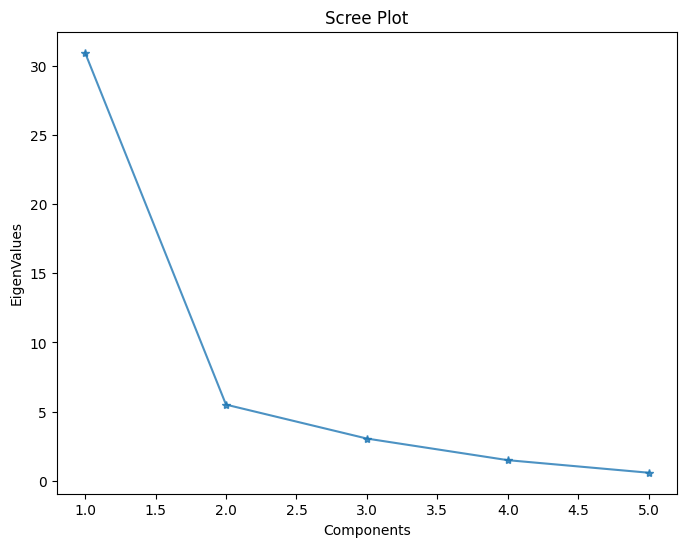

In [30]:
fig = plt.figure(figsize=(8,6))
# Scree Plot
plt.plot(range(1,len(myPCA.singular_values_)+1),myPCA.singular_values_,alpha=0.8,marker='*')
y_label = plt.ylabel('EigenValues')
x_label = plt.xlabel('Components')
plt.title('Scree Plot')

#### % of Explained Variance by Component

Text(0.5, 1.0, 'Percentage of variance explained by component')

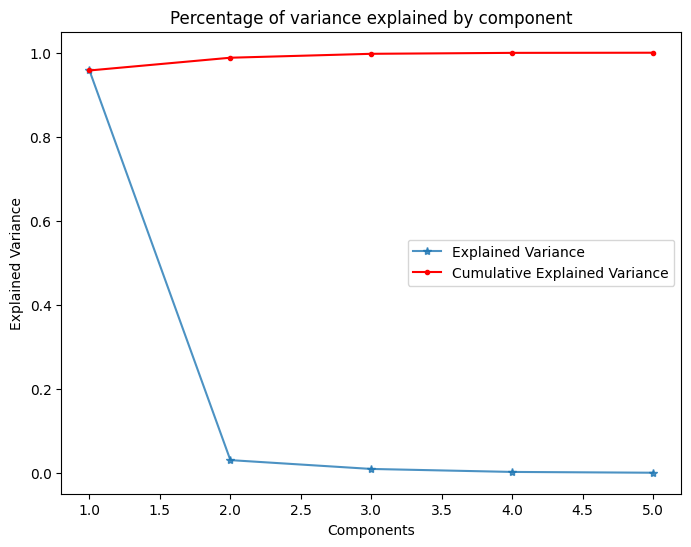

In [31]:
fig = plt.figure(figsize=(8,6))
plt.plot(range(1,len(myPCA.explained_variance_ratio_)+1),myPCA.explained_variance_ratio_,alpha=0.8,marker='*', label="Explained Variance")
y_label = plt.ylabel("Explained Variance")
x_label = plt.xlabel("Components")
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),np.cumsum(myPCA.explained_variance_ratio_),c='r',marker='.',label="Cumulative Explained Variance")
plt.legend()
plt.title('Percentage of variance explained by component')


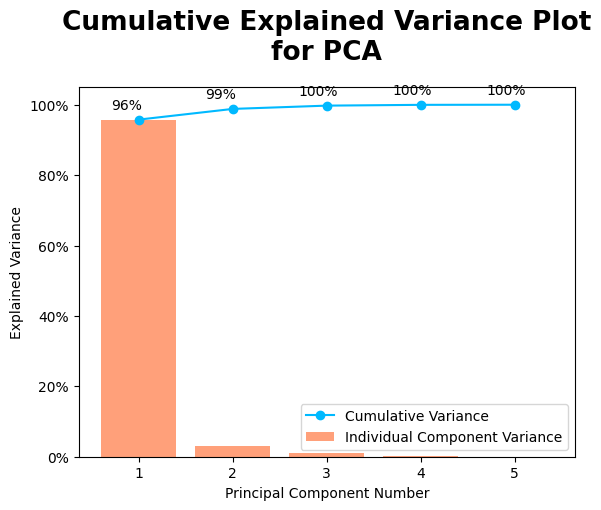

In [32]:
import matplotlib.ticker as mtick
init_dimensions = 5 # max num features


exp_var = myPCA.explained_variance_ratio_ ## variance of individual component
cumulative_explained_variance = np.cumsum(myPCA.explained_variance_ratio_)

fig, ax = plt.subplots()
def percent_formatter(x, pos):
    return f"{x*100:.0f}%"
## add individual variance bars
plt.bar(range(1, init_dimensions+1), exp_var, align='center',
        label='Individual Component Variance', color = 'lightsalmon')
## add cumulative variance line
plt.plot(range(1, init_dimensions+1), cumulative_explained_variance, marker="o",
         label='Cumulative Variance', color='#00B9FF')
## add cumulative variance annotation
for x, y in zip(range(1, init_dimensions+1), cumulative_explained_variance):
    ax.annotate(f"{round(y * 100):.0f}%", (x - 0.3, y + 0.03))

## add label, title, ticks
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance')
plt.title('Cumulative Explained Variance Plot\nfor PCA', fontsize=19, fontweight="bold", pad=20)
plt.xticks(range(1, init_dimensions+1))

## format y-axis
ax.yaxis.set_major_formatter(mtick.FuncFormatter(percent_formatter))
## legend location
plt.legend(loc='best')
plt.show()

In [33]:
# find the number od PC to describe the 96% of variability of the entire dataset

total_explained_variance = myPCA.explained_variance_ratio_.cumsum()
n_over_96 = len(total_explained_variance[total_explained_variance >= .96])
n_to_reach_96 = total_explained_variance.shape[0] - n_over_96 + 1
print(f"To explain 96% of variance with PCS, we need the first {n_to_reach_96} principal components")

To explain 96% of variance with PCS, we need the first 2 principal components


We can also visualize the weights that the PCA assigns to each component.

<Axes: >

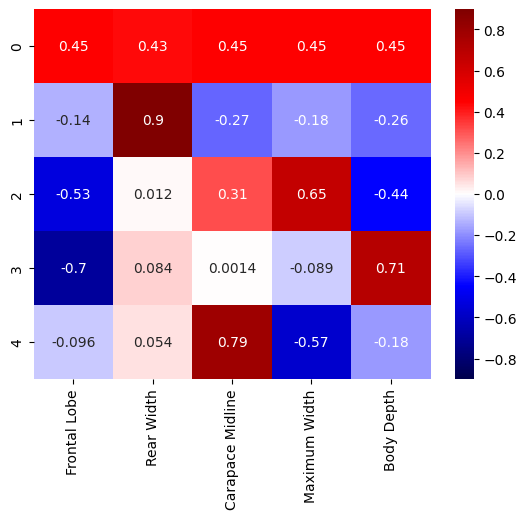

In [34]:
sns.heatmap(myPCA.components_,cmap='seismic',xticklabels = list(df.columns[3:-1]),
            vmin=-np.max(np.abs(myPCA.components_)),vmax=np.max(np.abs(myPCA.components_)),
            annot=True)

### PCA: Transformation and Visualization
Now we can transform our dataset using the "trained" PCA.

Generally, for visualization, 2 or 3 components are chosen.

We will choose 3 Components

In [35]:
transformed = myPCA.transform(df_standardized[data_columns])
## add the 3 Principal component coordinates to the dataset
df_standardized[['PC1','PC2','PC3']] = transformed[:,:3]

In [36]:
df_standardized.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,PC1,PC2,PC3
0,Blue,Male,1,-2.146232,-2.352450,-2.253926,-2.217772,-2.057989,BlueMale,-4.927573,-0.268445,-0.122258
1,Blue,Male,2,-1.945462,-1.962875,-1.972282,-1.988538,-1.940899,BlueMale,-4.386176,-0.094074,-0.039232
2,Blue,Male,3,-1.830736,-1.923917,-1.845543,-1.784775,-1.853083,BlueMale,-4.128664,-0.168876,0.033644
3,Blue,Male,4,-1.716010,-1.884960,-1.690638,-1.695629,-1.706721,BlueMale,-3.883681,-0.246008,0.014501
4,Blue,Male,5,-1.658647,-1.846002,-1.662474,-1.708364,-1.706721,BlueMale,-3.834055,-0.224166,-0.015067


Visualize First 2 Components of PCA

[Text(0.5, 1.0, 'PC1-PC2 class Plot')]

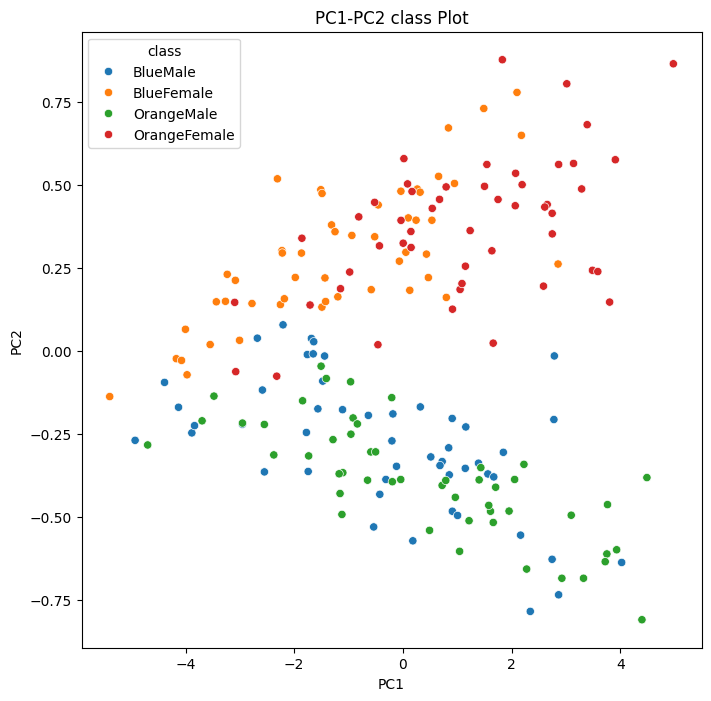

In [37]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='PC1',y='PC2',hue='class',data = df_standardized).set(title='PC1-PC2 class Plot')

We can see that PCA does a good job with this data.

#### Visualize with 3 Components of PCA

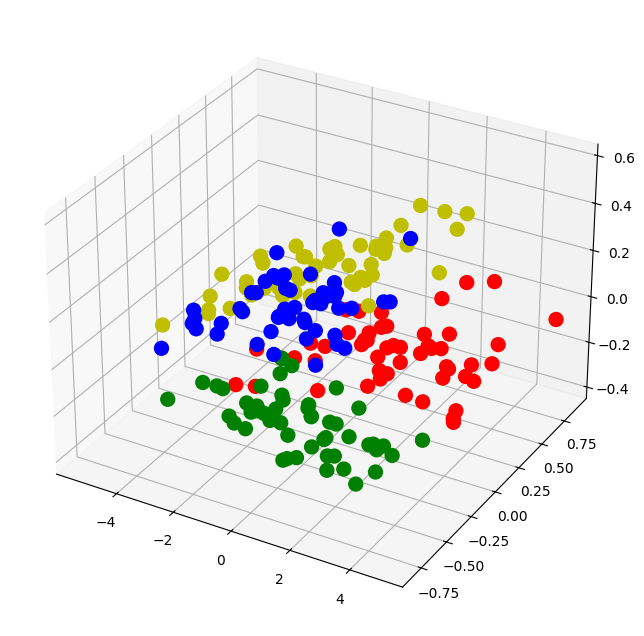

In [38]:
colors_crabs = {'BlueFemale': 'y', 'BlueMale': 'b', 'OrangeFemale': 'r', 'OrangeMale': 'g'}

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

x = df_standardized.PC1
y = df_standardized.PC2
z = df_standardized.PC3
plt.scatter(x,y,zs=z,depthshade=False,
            c=df['class'].apply(lambda x: colors_crabs[x]),s=100)


### With Plotly

In [39]:
fig = px.scatter_3d(df_standardized,x='PC1',y='PC2',z='PC3',color = 'class')
fig.show()